# Générer les Word2Vec pour les contes de Grimm
- tokeniser les fichiers

In [13]:
import numpy as np
import gensim, logging
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import codecs


### Nettoyage du texte
Il faudrait gérer les apostrophes et les tirets en amont pour éviter des mots comme sil ou lautre.

In [14]:
charabia="Francais" # Francais ou Aveugle
# pointer repName vers le répertoire des corpus Grimm
repName="/Users/gilles/ownCloud/Cours/Bordeaux/M2-TraitementsCorpus/"
fName="Corpus%s-Sentenced.txt"%charabia
with codecs.open(repName+fName,"r",encoding="utf8") as inFile:
    brutLignes=[l.strip() for l in inFile.readlines()]

In [15]:
sentTokens=[]
for line in brutLignes[:]:
    words=line.split(" ")
    if words[-1][-1] in "?.!":
        words[-1]=words[-1][:-1]
    sentTokens.append(words)

In [18]:
sentTokens

[['098', '—', 'le', 'docteur', 'universel'],
 ['il', 'y', 'avait', 'une', 'fois', 'un', 'paysan', 'nommé', 'écrevisse'],
 ['ayant',
  'porté',
  'une',
  'charge',
  'de',
  'bois',
  'chez',
  'un',
  'docteur',
  'il',
  'remarqua',
  'les',
  'mets',
  'choisis',
  'et',
  'les',
  'vins',
  'fins',
  'dont',
  'se',
  'régalait',
  'celuici',
  'et',
  'demanda',
  'en',
  'ouvrant',
  'de',
  'grands',
  'yeux',
  'sil',
  'ne',
  'pourrait',
  'pas',
  'aussi',
  'devenir',
  'docteur'],
 ['oui',
  'certes',
  'répondit',
  'le',
  'savant',
  'il',
  'suffit',
  'pour',
  'cela',
  'de',
  'trois',
  'choses',
  '1°',
  'procuretoi',
  'un',
  'abécédaire',
  'cest',
  'le',
  'principal',
  '2°',
  'vends',
  'ta',
  'voiture',
  'et',
  'tes',
  'bœufs',
  'pour',
  'acheter',
  'une',
  'robe',
  'et',
  'tout',
  'ce',
  'qui',
  'concerne',
  'le',
  'costume',
  'dun',
  'docteur',
  '3°',
  'mets',
  'à',
  'ta',
  'porte',
  'une',
  'enseigne',
  'avec',
  'ces',
  'mot

### Paramètres du perceptron qui génère les vecteurs
On peut faire varier la fréquence minimale pour inclure plus ou moins de vocabulaire dans l'espace vectoriel.

Faire baisser la fréquence permet d'avoir plus de vocabulaire mais la qualité des vecteurs peut baisser si on inclut des mots qui n'apparaissent pas suffisament pour être bien placés.

In [80]:
min_frequency = 50 # seuil de fréquence pour participer à l'espace vectoriel
neurons = 200 # nombre de neurones du perceptron
window = 7 # taille de la fenêtre autour des mots à vectoriser
negative_sampling = 15 # nombre de mots à négativiser
epochs = 10 # nombre d'époque pour le perceptron

In [81]:
#train word2vec
if 'modelCharabia' in globals():
    rep=input("nouveau modèle pour le %s ?"%charabia)
    if rep=="oui":
        modelCharabia = gensim.models.Word2Vec(sentTokens, min_count=min_frequency, size=neurons, iter=epochs, window=window, negative=negative_sampling)
        modelCharabia.save(repName+"Word2Vec-Model%s.gensim"%charabia)
    else:
        try:
            modelCharabia = gensim.models.Word2Vec.load(repName+'Word2Vec-Model%s.gensim'%charabia)
        except:
            print("pas de modèle %s en stock"%charabia)
else:
    modelCharabia = gensim.models.Word2Vec(sentTokens, min_count=min_frequency, size=neurons, iter=epochs, window=window, negative=negative_sampling)
    modelCharabia.save(repName+"Word2Vec-Model%s.gensim"%charabia)
    

nouveau modèle pour le Francais ?oui


### Utilisation des vecteurs

In [82]:
print (len(modelCharabia.wv.vocab))
print (modelCharabia.wv.vocab.keys())

384
dict_keys(['—', 'le', 'il', 'y', 'avait', 'une', 'fois', 'un', 'paysan', 'de', 'bois', 'chez', 'les', 'et', 'dont', 'se', 'celuici', 'demanda', 'en', 'yeux', 'sil', 'ne', 'pas', 'aussi', 'oui', 'répondit', 'pour', 'cela', 'trois', 'cest', 'ta', 'tes', 'tout', 'ce', 'qui', 'dun', 'à', 'porte', 'avec', 'ces', 'je', 'suis', 'la', 'peine', 'son', 'fut', 'seigneur', 'du', 'fait', 'mettre', 'sa', 'notre', 'homme', 'est', 'bien', 'moi', 'mon', 'dit', 'mais', 'ma', 'femme', 'tous', 'deux', 'dans', 'arriva', 'au', 'château', 'table', 'était', 'prendre', 'place', 'encore', 'voilà', 'moment', 'où', 'premier', 'lui', 'voulait', 'dire', 'comme', 'ses', 'nest', 'bonne', 'a', 'que', 'sans', 'entrer', 'tour', 'nouveau', 'troisième', 'eut', 'même', 'plus', 'des', 'maître', 'maison', 'votre', 'quil', 'pauvre', 'on', 'cétait', 'alors', 'aussitôt', 'sortir', 'quils', 'sont', 'donner', 'point', 'puis', 'ils', 'vais', 'maintenant', 'cependant', 'sétait', 'voir', 'trouver', 'tu', 'es', 'là', 'cet', 'bien

In [83]:
print (len(model200.wv.vocab))
print (len(model100.wv.vocab))
print (len(modelCharabia.wv.vocab))


715
715
384


In [84]:
model200.wv.most_similar(positive=['reine'], negative=[], topn=10)

[('fiancée', 0.809677004814148),
 ('mariée', 0.7613540887832642),
 ('princesse', 0.7379088401794434),
 ('servante', 0.7164677381515503),
 ('fille', 0.7017793655395508),
 ('grenouille', 0.6967083215713501),
 ('sorcière', 0.6300172805786133),
 ('voix', 0.5636745691299438),
 ('robe', 0.563005805015564),
 ('épouse', 0.5445151329040527)]

In [85]:
model100.wv.most_similar(positive=['reine'], negative=[], topn=10)

[('fiancée', 0.7883192300796509),
 ('servante', 0.7479735612869263),
 ('mariée', 0.7448936700820923),
 ('princesse', 0.7432534694671631),
 ('fille', 0.7205900549888611),
 ('grenouille', 0.6814132332801819),
 ('robe', 0.5761032104492188),
 ('épouse', 0.5727545022964478),
 ('femme', 0.5577770471572876),
 ('sorcière', 0.5412883758544922)]

In [86]:
modelCharabia.wv.most_similar(positive=['reine'], negative=[], topn=10)

[('fiancée', 0.9309455752372742),
 ('princesse', 0.8725484013557434),
 ('sorcière', 0.8400967121124268),
 ('fille', 0.8349201679229736),
 ('voix', 0.8269819021224976),
 ('troisième', 0.801382303237915),
 ('vieille', 0.7919996976852417),
 ('femme', 0.7853335738182068),
 ('prince', 0.7763664126396179),
 ('cependant', 0.7702615857124329)]

In [87]:
model200.wv.most_similar(positive=['roi',"femme"], negative=["homme"], topn=10)

[('jeune', 0.641918420791626),
 ('mariage', 0.6157798767089844),
 ('meunier', 0.5903218388557434),
 ('mariée', 0.4924080967903137),
 ('seconde', 0.4683539569377899),
 ('sorcière', 0.45381757616996765),
 ('moitié', 0.44662198424339294),
 ('château', 0.4404091238975525),
 ('servante', 0.43904680013656616),
 ('mère', 0.42273128032684326)]

In [88]:
model100.wv.most_similar(positive=['roi',"femme"], negative=["homme"], topn=10)

[('jeune', 0.6348799467086792),
 ('mariage', 0.5623572468757629),
 ('meunier', 0.5426201820373535),
 ('mariée', 0.5226881504058838),
 ('moitié', 0.4706118404865265),
 ('seconde', 0.46730148792266846),
 ('château', 0.4382106363773346),
 ('chèvre', 0.4245135188102722),
 ('mère', 0.4219397306442261),
 ('servante', 0.4073432981967926)]

In [89]:
modelCharabia.wv.most_similar(positive=['roi',"femme"], negative=["homme"], topn=10)

[('jeune', 0.8441269397735596),
 ('pauvre', 0.7171245217323303),
 ('sa', 0.6749454140663147),
 ('sorcière', 0.6704736948013306),
 ('troisième', 0.6624760627746582),
 ('vieille', 0.6600958704948425),
 ('voix', 0.6448855996131897),
 ('alors', 0.6353397965431213),
 ('main', 0.6244081854820251),
 ('chèvre', 0.6234040260314941)]

/var/folders/h7/0cygyb1j7cn88gdc53db7m6w0000gn/T/ipykernel_56326/1632485380.py:5: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  close_words = model.similar_by_word(word,topn=50)
/var/folders/h7/0cygyb1j7cn88gdc53db7m6w0000gn/T/ipykernel_56326/1632485380.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  arr = np.append(arr, np.array([model[word]]), axis=0)
/var/folders/h7/0cygyb1j7cn88gdc53db7m6w0000gn/T/ipykernel_56326/1632485380.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  wrd_vector = model[wrd_score[0]]


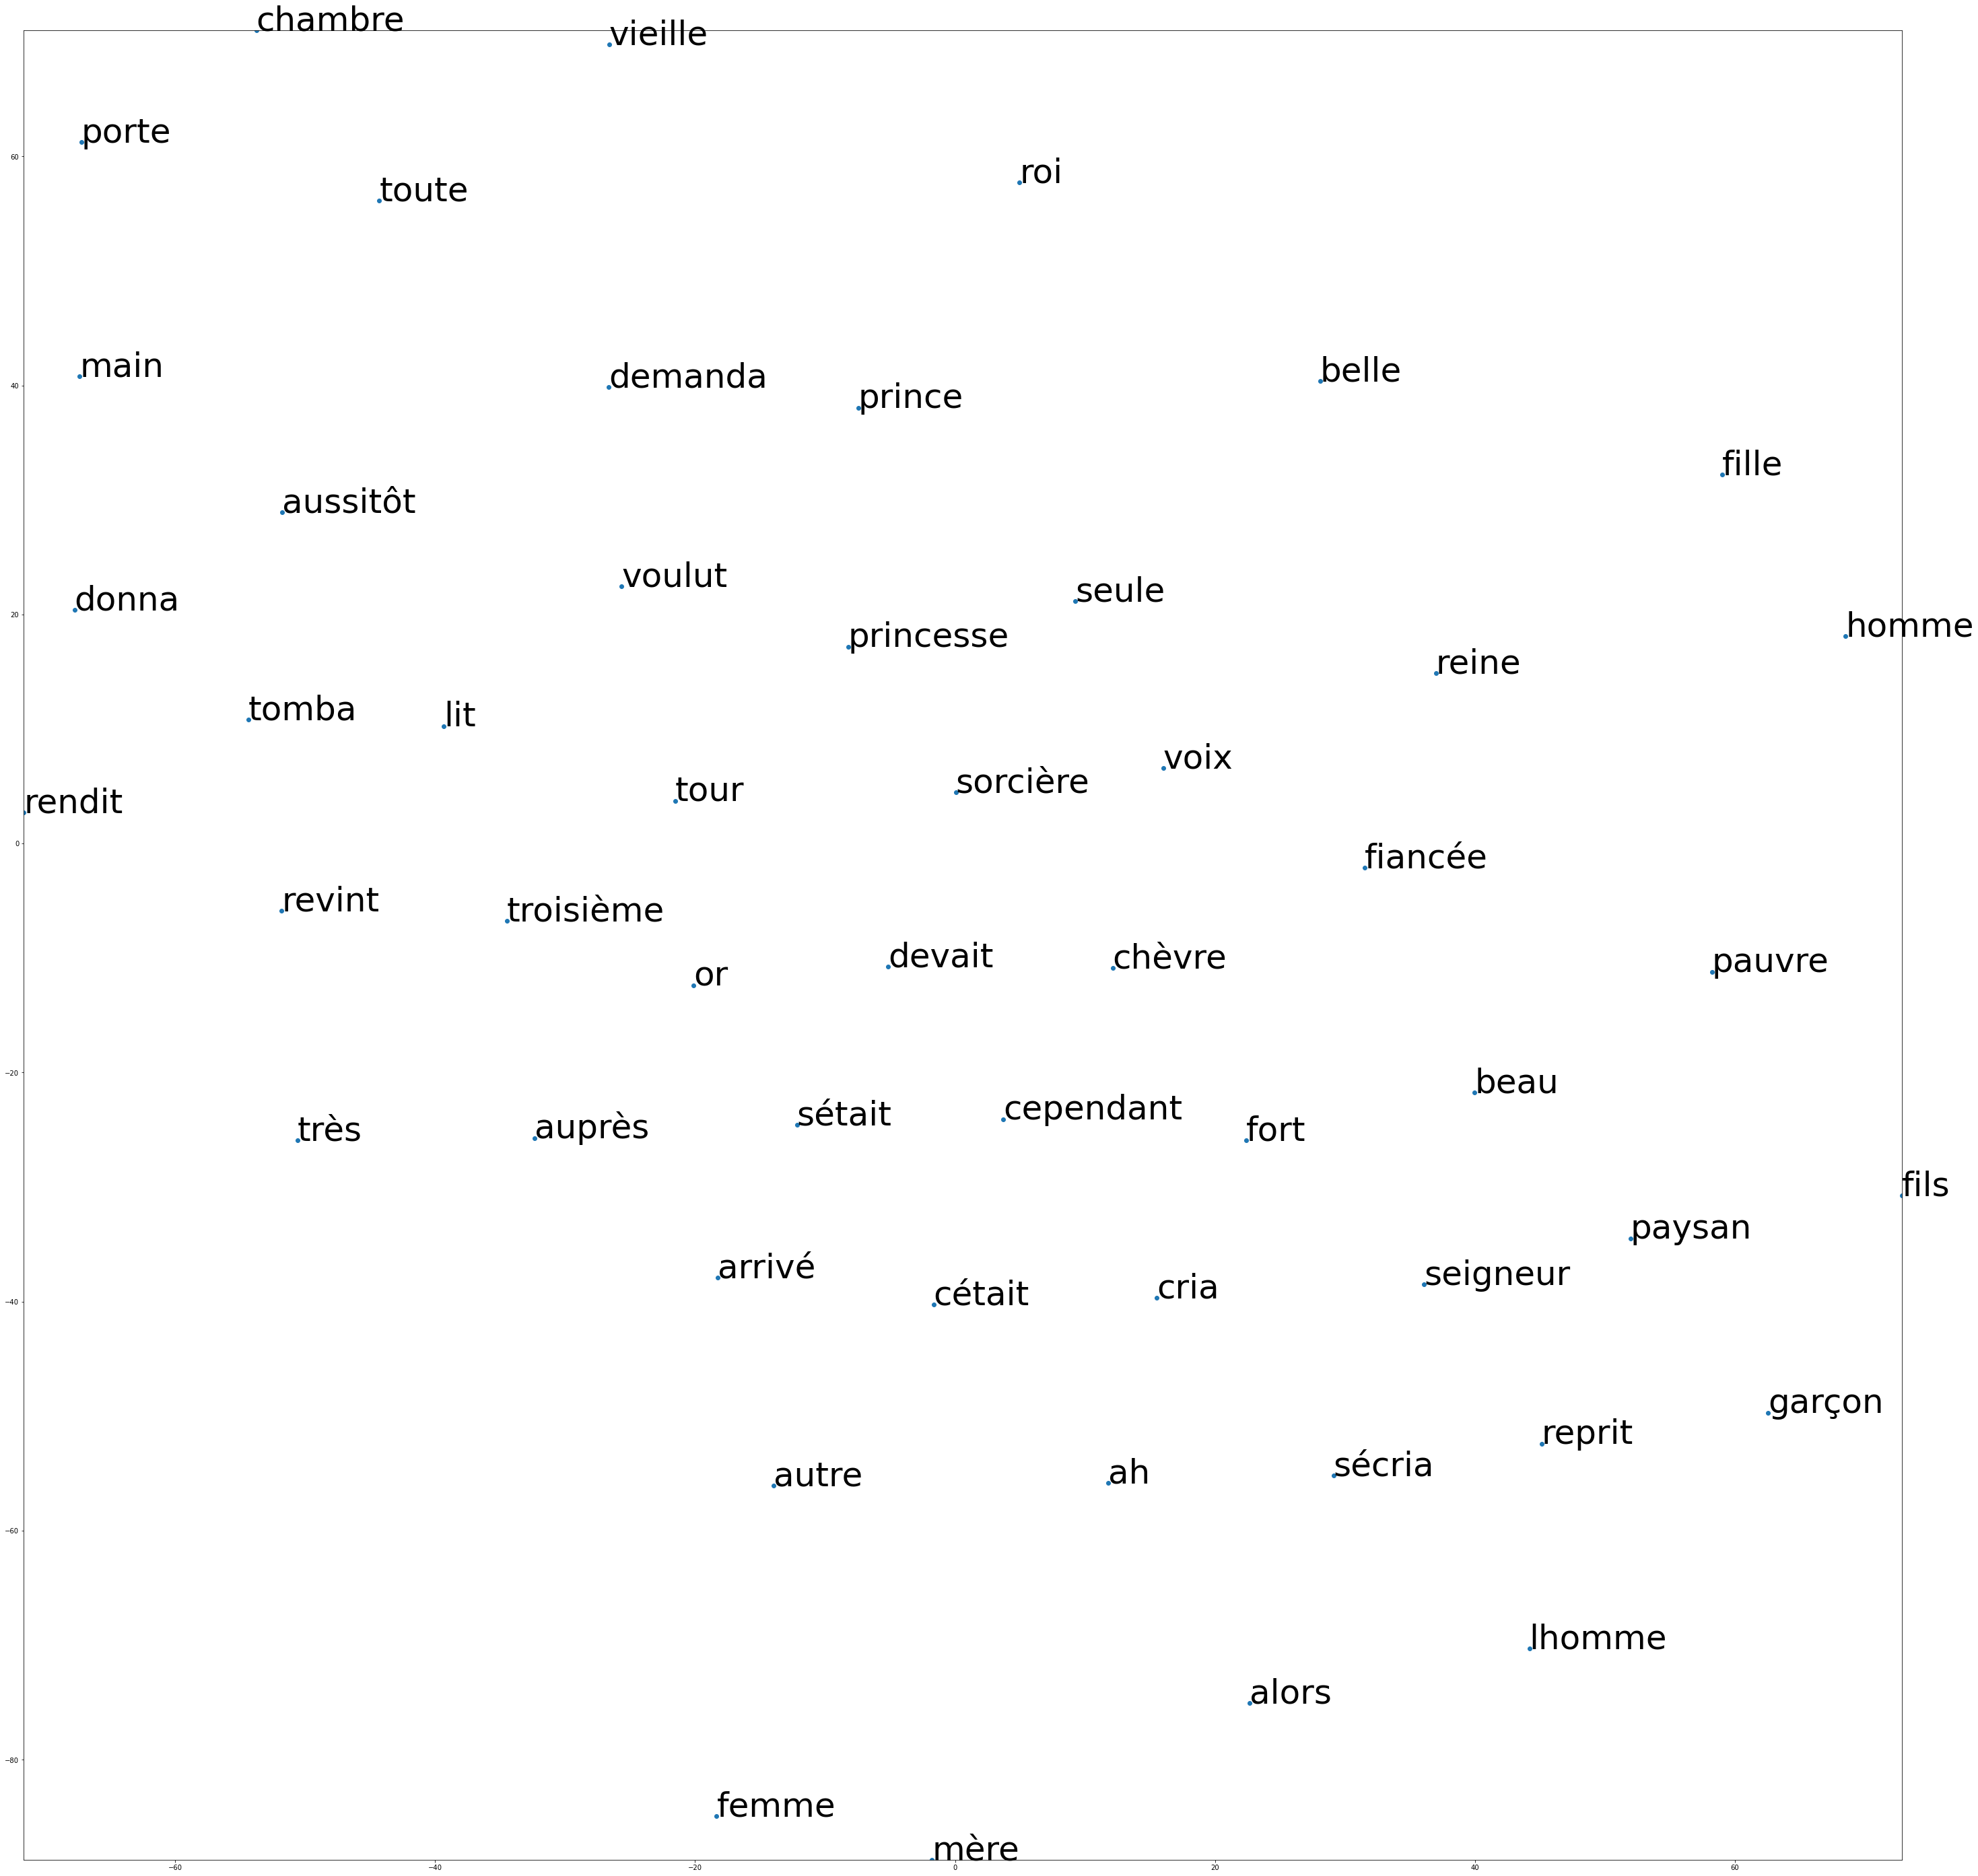

In [77]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.similar_by_word(word,topn=50)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.figure(figsize=(50,50))
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points',fontsize=50)
        plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
        plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

display_closestwords_tsnescatterplot(modelCharabia, 'reine', 300) 

